In [1]:
import pandas as pd
from pandas import DataFrame
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Fig 9

In [38]:
plt.style.use('classic')
df = pd.read_csv('../Dataset_npm.csv', sep=';')

y1 = df['CherryMlV']
y2 = df['CherryFV']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
plt.hist((y1,y2), bins=bins, edgecolor='b', label=('gitCherrypickedMLV->FV','gitCherrypickedFV->MLV' ), color=('#0000CD', '#DC143C'))
plt.xlim(0,170)
plt.grid(True)
plt.legend()
plt.ylabel('Number of Mainline-Fork pairs', fontsize=18)
plt.xlabel('Number of Cherry-picked Commits', fontsize=18)
plt.yticks(np.arange(0, 11000))
plt.yscale('log')
# plt.xticks((0.25, 0.75), (0, 1))
plt.tight_layout()
plt.savefig('../img/gitCherrypick_npm.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fig 10

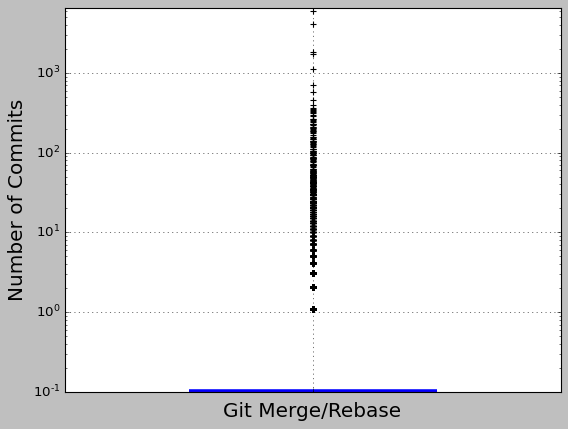

<Figure size 640x480 with 0 Axes>

In [7]:
# %matplotlib notebook
plt.style.use('classic')
df = pd.read_csv('../Dataset_npm.csv', sep=';')

plt.style.use('classic')
y1 = df['Git_MgRb_Com'] + 0.1

plt.boxplot(y1, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#008080', linewidth=5))

plt.ylim(0.1,6500)
plt.grid(True)
plt.xlabel('Git Merge/Rebase', fontsize=18)
plt.ylabel('Number of Commits', fontsize=18)
plt.xticks([1], [''])
plt.yscale('log')
plt.show()
plt.savefig('../img/gitPull_npm.pdf')


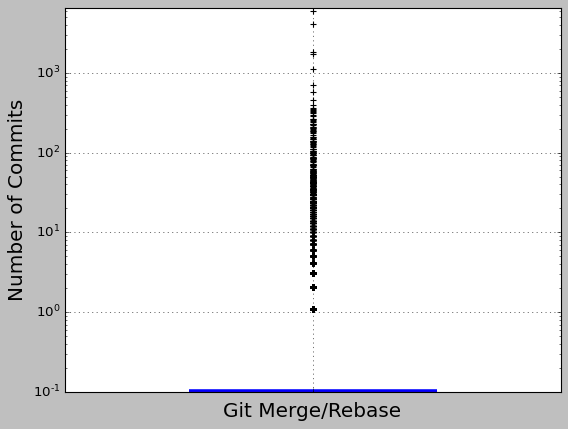

In [14]:
# %matplotlib notebook
plt.boxplot(df["Git_MgRb_Com"]+0.1, widths=0.5, patch_artist=True, medianprops=dict(color='red'), capprops=dict(color='red'), boxprops=dict(facecolor='#008080', color='blue', linewidth=5), whiskerprops=dict(color='red'),)
plt.ylim(0.1,6500)
plt.grid(True)
plt.xlabel('Git Merge/Rebase', fontsize=18)
plt.ylabel('Number of Commits', fontsize=18)
plt.xticks([1], [''])
plt.yscale('log')
plt.savefig('../img/gitPull_npm.pdf')
plt.show()

<ipython-input-65-357d38ff32ac>:6: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', basey=2)


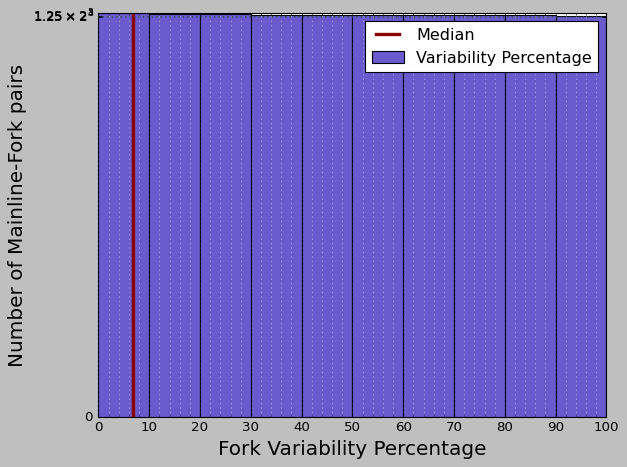

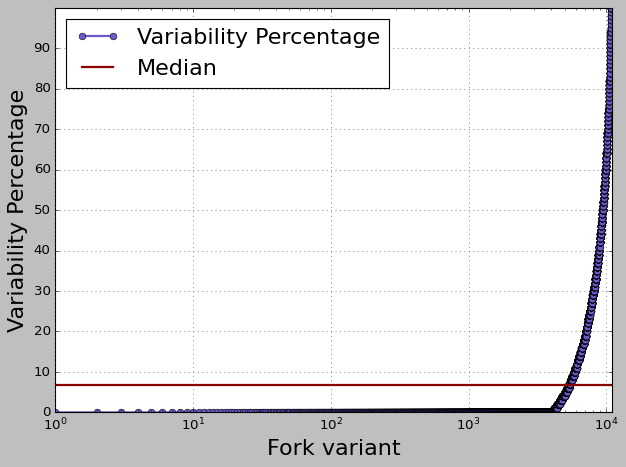

In [65]:
plt.style.use('classic')
df = pd.read_csv('../Dataset_npm.csv', sep=';')

y1 = df['Variability1']
fig, ax = plt.subplots()
ax.set_yscale('log', basey=2)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(y1, bins=bins, edgecolor='black', label='Variability Percentage', color='#6A5ACD')
plt.xlim(0,100)
plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC')

median = 6.8
color = '#8B0000'
plt.axvline(median, color=color, label = 'Median', linewidth=3)
plt.ylabel('Number of Mainline-Fork pairs', fontsize=18)
plt.xlabel('Fork Variability Percentage', fontsize=18)
plt.yticks(np.arange(0, 50, 10))
plt.xticks(np.arange(0, 101, 10))
plt.legend()
plt.tight_layout()
plt.savefig('../img/variability_npm.pdf')
plt.show()

y1 = y1.sort_values()
x1 = range(1,len(y1)+1)
plt.plot(x1, y1, color='#6A5ACD', linewidth=2, marker='o', label='Variability Percentage')
plt.xlim(1,11000)
plt.ylim(0,100, 10)
plt.xscale('log')
plt.axhline(median, color=color, label = 'Median', linewidth=2)
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Fork variant', fontsize=20)
plt.ylabel('Variability Percentage', fontsize=20)
plt.legend(fontsize=20, loc="upper left")
plt.grid(True, which='major', color='#2F4F4F')
# plt.grid(True, which='minor', color='#DCDCDC', linestyle='-')
plt.tight_layout()
plt.savefig('../img/variability1_npm.pdf')
plt.show()

    counts  numbers
0        2     7994
1        3      918
2        4      174
3        5       46
4        6       16
5        7        8
6        8        7
7       10        1
8       11        3
9       12        1
10      13        1
11      16        1


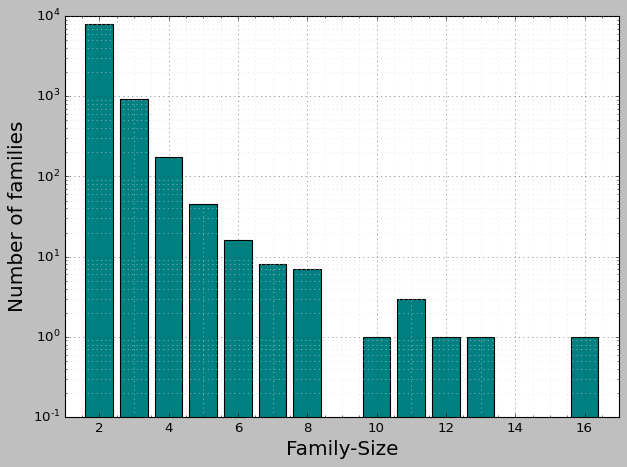

In [8]:
df = pd.read_csv('../Dataset_npm.csv', sep=';')

plt.style.use('classic')
df_fam1 = DataFrame({'count' : df.groupby( ['MLV'] ).size()}).reset_index()
df_fam1['count'] = df_fam1['count'] +1
# print(df_fam1['count'].sort_values().head(10))
df22 = df.groupby(['MLV']).size().reset_index(name='counts')
df22 = df22.set_index('counts')
df22 = df22.groupby(['counts']).size().reset_index(name='numbers')
df22['counts'] =df22['counts'] + 1
print(df22)
plt.xlabel('Family-Size', fontsize=18)
plt.ylabel('Number of families',fontsize=18)
plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC')
plt.bar(df22['counts'],df22['numbers'], color='#008080')
plt.xlim(1,17)
plt.ylim(0.1,10000)
plt.yscale('log')
plt.tight_layout()
plt.savefig('../img/variants_npm.pdf')
plt.show()
